In [1]:
import pertpy as pt
import scanpy as sc
import pandas as pd
import pandas as pd
import pandas as pd
import scvi
from _quasiSCVI import QuasiSCVI
from _quasivae import QuasiVAE
from anndata import AnnData

# Load a sample dataset
mdata = pt.dt.papalexi_2021()



OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:430: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:430: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:430: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:430: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/s

In [2]:
adata=mdata["rna"]


In [3]:
mdata

MuData object with n_obs × n_vars = 20729 × 18776
  4 modalities
    rna:	20729 x 18649
      obs:	'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_HTO', 'nFeature_HTO', 'nCount_GDO', 'nCount_ADT', 'nFeature_ADT', 'percent.mito', 'MULTI_ID', 'HTO_classification', 'guide_ID', 'gene_target', 'NT', 'perturbation', 'replicate', 'S.Score', 'G2M.Score', 'Phase'
      var:	'name'
    adt:	20729 x 4
      obs:	'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_HTO', 'nFeature_HTO', 'nCount_GDO', 'nCount_ADT', 'nFeature_ADT', 'percent.mito', 'MULTI_ID', 'HTO_classification', 'guide_ID', 'gene_target', 'NT', 'perturbation', 'replicate', 'S.Score', 'G2M.Score', 'Phase'
      var:	'name'
    hto:	20729 x 12
      obs:	'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_HTO', 'nFeature_HTO', 'nCount_GDO', 'nCount_ADT', 'nFeature_ADT', 'percent.mito', 'MULTI_ID', 'HTO_classification', 'guide_ID', 'gene_target', 'NT', 'perturbation', 'replicate', 'S.Score', 'G2M.Score', 'Phase'
      var:	'name'
    gdo:	20729 x 111
      obs:	'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_HTO', 'nFeature_HTO', 'nCount_GDO', 'nCount_ADT', 'nFeature_ADT', 'percent.mito', 'MULTI_ID', 'HTO_classification', 'guide_ID', 'gene_target', 'NT', 'perturbation', 'replicate', 'S.Score', 'G2M.Score', 'Phase'
      var:	'name'

In [4]:
mdata.mod["gdo"]

AnnData object with n_obs × n_vars = 20729 × 111
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_HTO', 'nFeature_HTO', 'nCount_GDO', 'nCount_ADT', 'nFeature_ADT', 'percent.mito', 'MULTI_ID', 'HTO_classification', 'guide_ID', 'gene_target', 'NT', 'perturbation', 'replicate', 'S.Score', 'G2M.Score', 'Phase'
    var: 'name'

In [5]:
gdo = mdata.mod["gdo"]

# Extract the guide count matrix
gdo.X

<20729x111 sparse matrix of type '<class 'numpy.float32'>'
	with 2300919 stored elements in Compressed Sparse Column format>

In [6]:
gdo = mdata.mod["gdo"]

# Extract the guide count matrix
guide_count_matrix = gdo.X


guide_count_df = pd.DataFrame(guide_count_matrix.toarray(), index=gdo.obs.index, columns=gdo.var.index)

print(guide_count_df)

index                eGFPg1  CUL3g1  CUL3g2  CUL3g3  CMTM6g1  CMTM6g2  \
index                                                                   
l1_AAACCTGAGCCAGAAC     1.0     1.0     1.0     1.0      1.0      1.0   
l1_AAACCTGAGTGGACGT     1.0     1.0     1.0     1.0      1.0      1.0   
l1_AAACCTGCATGAGCGA     1.0     1.0     1.0     1.0      1.0      1.0   
l1_AAACCTGTCTTGTCAT     1.0     1.0     1.0     1.0      1.0      1.0   
l1_AAACGGGAGAACAACT     1.0     1.0     1.0     1.0      1.0      1.0   
...                     ...     ...     ...     ...      ...      ...   
l8_TTTGTCAGTCACTTCC     1.0     1.0     1.0     1.0    177.0      2.0   
l8_TTTGTCAGTGACGGTA     1.0     1.0     1.0     1.0      1.0      1.0   
l8_TTTGTCAGTTCCACAA     1.0     1.0     1.0     1.0      1.0      1.0   
l8_TTTGTCATCACGCATA     1.0     1.0     1.0     1.0      1.0      1.0   
l8_TTTGTCATCTGTACGA     1.0     1.0     1.0     1.0      1.0      1.0   

index                CMTM6g3  NTg1  NTg2  NTg3  ..

In [7]:
guide_adata = sc.AnnData(X=guide_count_df.values)
guide_adata.obs.index = guide_count_df.index
guide_adata.var.index = guide_count_df.columns
guide_adata.obs['replicate'] = mdata["rna"].obs['replicate']
guide_adata.obs['Phase'] = mdata["rna"].obs['Phase']
guide_adata.obs['perturbation'] = mdata["rna"].obs['perturbation']
guide_adata.obs['guide']= mdata["rna"].obs['NT']
# Inspect the AnnData object
print(guide_adata)

AnnData object with n_obs × n_vars = 20729 × 111
    obs: 'replicate', 'Phase', 'perturbation', 'guide'


In [8]:
scvi.model.SCVI.setup_anndata(guide_adata)


In [9]:
scvi_ref = scvi.model.SCVI(
    guide_adata,
    use_layer_norm="both",
    use_batch_norm="none",
    encode_covariates=True,
    dropout_rate=0.2,
    n_layers=2,
)
scvi_ref.train()

GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/lightning/pytorch/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.


Epoch 386/386: 100%|████████████████████████████████████████████████████████████████████████████████| 386/386 [03:51<00:00,  1.57it/s, v_num=1, train_loss_step=148, train_loss_epoch=146]

`Trainer.fit` stopped: `max_epochs=386` reached.


Epoch 386/386: 100%|████████████████████████████████████████████████████████████████████████████████| 386/386 [03:51<00:00,  1.67it/s, v_num=1, train_loss_step=148, train_loss_epoch=146]


In [10]:
guide_embeddings = scvi_ref.get_latent_representation()
guide_embeddings_df = pd.DataFrame(guide_embeddings, index=guide_adata.obs.index)
adata_ref = mdata["rna"].copy()
adata_ref.obsm['X_guide_embeddings'] = guide_embeddings


QuasiSCVI.setup_anndata(adata=adata_ref, batch_key='replicate', labels_key='perturbation',guide_embedding_key="X_guide_embeddings")
print(adata_ref)

INFO     Generating sequential column names                                                                        
AnnData object with n_obs × n_vars = 20729 × 18649
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_HTO', 'nFeature_HTO', 'nCount_GDO', 'nCount_ADT', 'nFeature_ADT', 'percent.mito', 'MULTI_ID', 'HTO_classification', 'guide_ID', 'gene_target', 'NT', 'perturbation', 'replicate', 'S.Score', 'G2M.Score', 'Phase', '_scvi_batch', '_scvi_labels'
    var: 'name'
    uns: '_scvi_uuid', '_scvi_manager_uuid'
    obsm: 'X_guide_embeddings'


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scvi/data/fields/_layer_field.py:116: UserWarning: Training will be faster when sparse matrix is formatted as CSR. It is safe to cast before model initialization.
  _verify_and_correct_data_format(adata, self.attr_name, self.attr_key)


In [11]:
print(guide_embeddings)


[[ 0.93506336 -0.5343365   0.81895804 ... -1.0750695   0.67412496
   0.51727897]
 [ 1.3533641  -0.2715086  -0.55584806 ... -1.2039444  -0.6735251
   1.3218724 ]
 [-2.4924703  -0.93314207  0.10951015 ...  1.4482262   0.33778802
   0.39596936]
 ...
 [-1.4655051  -1.82399    -1.5530269  ... -0.8353519  -0.18077448
   0.3346363 ]
 [-0.36609074  1.8002663  -1.1305268  ...  0.08012185 -0.1521846
  -1.3343217 ]
 [-0.35891157  1.0890894  -0.6162318  ... -2.2975729  -0.05951148
   1.1918051 ]]


In [12]:
guide_model = QuasiSCVI(
    adata_ref,
    use_layer_norm="both",
    use_batch_norm="none",
    encode_covariates=True,
    dropout_rate=0.2,
    n_layers=2,
)

# Train the model
guide_model.train(max_epochs=100, plan_kwargs={"lr": 1e-4}, accelerator='gpu')

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scvi/train/_trainrunner.py:70: UserWarning: `accelerator` has been set to `mps`. Please note that not all PyTorch operations are supported with this backend. Refer to https://github.com/pytorch/pytorch/issues/77764 for more details.
  accelerator, lightning_devices, device = parse_device_args(
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.


Epoch 100/100: 100%|█████████████████████████████████████████████████████████████████████████| 100/100 [28:15<00:00, 16.45s/it, v_num=1, train_loss_step=2.9e+4, train_loss_epoch=3.05e+4]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 100/100: 100%|█████████████████████████████████████████████████████████████████████████| 100/100 [28:15<00:00, 16.96s/it, v_num=1, train_loss_step=2.9e+4, train_loss_epoch=3.05e+4]


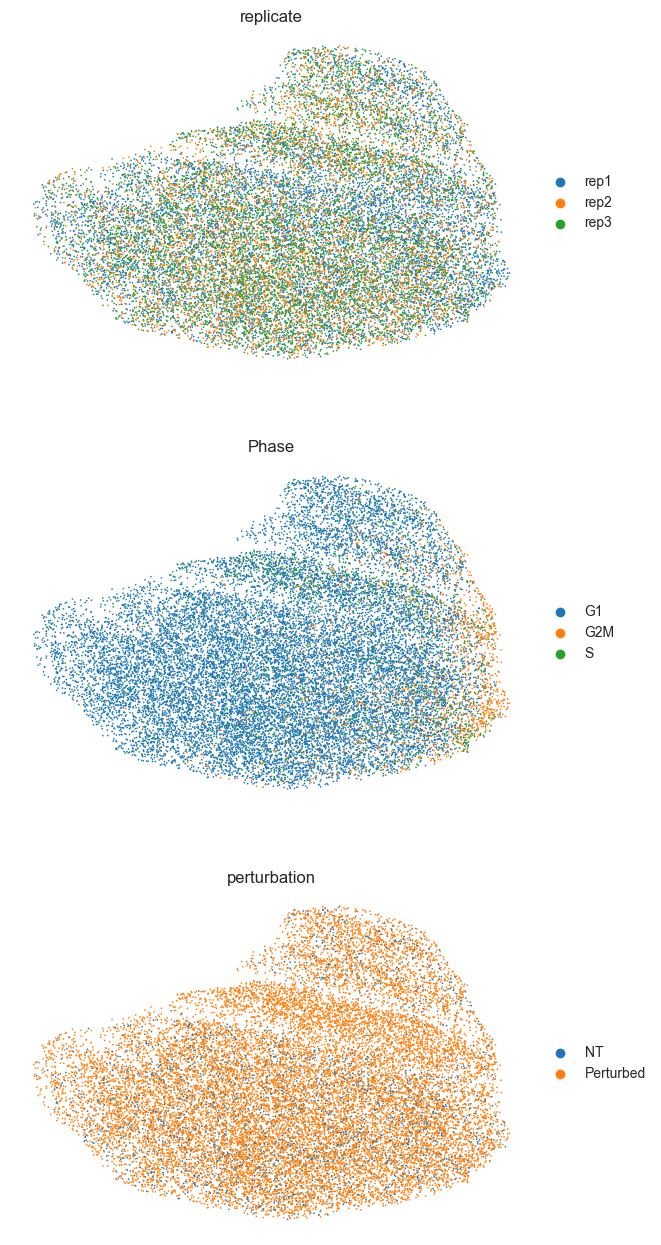

In [14]:
SCVI_LATENT_KEY = "X_scVI"

adata_ref.obsm[SCVI_LATENT_KEY] = guide_model.get_latent_representation()
sc.pp.neighbors(adata_ref, use_rep=SCVI_LATENT_KEY)
sc.tl.leiden(adata_ref)
sc.tl.umap(adata_ref)
sc.pl.umap(
    adata_ref,
    color=["replicate", "Phase", "perturbation" ],
    frameon=False,
    ncols=1,
)

In [ ]:
guide_adata.obs

In [ ]:
import numpy as np
adata_ref = mdata["rna"].copy()

print("Shape of adata_ref.X:", adata_ref.X.shape)
print("Shape of guide_embeddings_df.values:", guide_embeddings_df.values.shape)
if not isinstance(adata_ref.X, np.ndarray):
    adata_ref.X = adata_ref.X.toarray()

# Ensure guide_embeddings_df.values is a numpy array
guide_embeddings_array = guide_embeddings_df.values

# Concatenate gene expression data (X) with guide embeddings along columns
combined_X = np.concatenate([adata_ref.X, guide_embeddings_array], axis=1)
print(combined_X.shape)
# Create a new AnnData object with the combined data
combined_adata = AnnData(
    X=combined_X,
    obs=adata_ref.obs,
    var=pd.concat([adata_ref.var, pd.DataFrame(index=guide_embeddings_df.columns)]),
    obsm=adata_ref.obsm
)
QuasiSCVI.setup_anndata(
    adata=combined_adata, 
    batch_key='replicate', 
    labels_key='perturbation',
    guide_embedding_key="X_guide_embeddings"
)